Part 1: Find a linear classifier using logistic regression to classify the data 使用逻辑回归找到线性分类器对数据进行分类

Part 2: Plot the decsion boundary along with the data 绘制决策边界

Part 3: Plot the normal of the decision boundary 绘制决策边界的法线

In [18]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
def plotClass(X,y,p):
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)

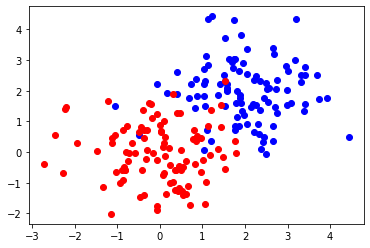

In [20]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+2
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')

In [21]:
def get_z(X, w, b):
  return w@X + b

def sigmoid(z):
  return 1/(1 + np.exp(-z))

def get_loss(y, yhat):
  return np.sum(-y * np.log(yhat) - (1 - y) * np.log(1 - yhat), axis = 1)

In [22]:
ni = X.shape[0]
no = y.shape[0]

w = np.random.randn(no, ni)
b = 0

Z = get_z(X, w, b)
#print(Z.shape)

yhat = sigmoid(Z)
#print(yhat)

loss = get_loss(y, yhat)
#print(loss)

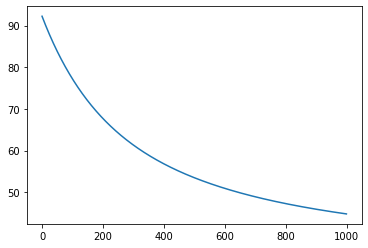

In [23]:
lr = 1e-4
ls = []
for i in range(1000):
  # dJ / d yhat ---> dyhat
  # dJ / dz ---> dz
  # dJ / dw ---> dw
  # dJ / db ---> db

  #forward pass(给定输入找输出)

  Z = get_z(X, w, b)

  yhat = sigmoid(Z)

  loss = get_loss(y, yhat)

  ls.append(loss)

  #backward pass
  dz = yhat - y

  #dJ/dW = [dJ/dyhat * dyhat/z] * dz/dW
  #dJ/dW = [dz] * dz/dw
  #dz/dw = X.T

  dw = dz @ X.T

  db = np.sum(dz, axis = 1, keepdims = True)

  #weight update
  w -= lr*dw
  b -= lr*db

plt.plot(ls)

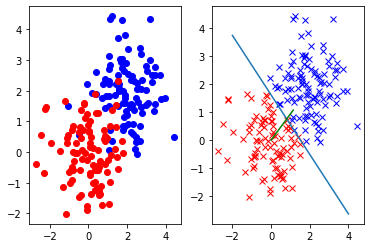

In [24]:
plt.figure()
plt.subplot(121)
plotClass(X,y,'o')
plt.subplot(122)
plotClass(X,yhat>0.5,'x')

#w1 * x1 + w2 * x2 + b = 0
x1 = np.linspace(-2, 4, 10)
x2 = (-b - w[0, 0]*x1) / w[0, 1]
plt.plot(x1, x2.squeeze())
plt.plot([0 , w[0, 0]], [0, w[0,1]], 'g')